In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 *X +np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.89603344],
       [2.98234288]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [7]:
y_predict = X_new_b.dot(theta_best)

In [8]:
y_predict

array([[3.89603344],
       [9.8607192 ]])

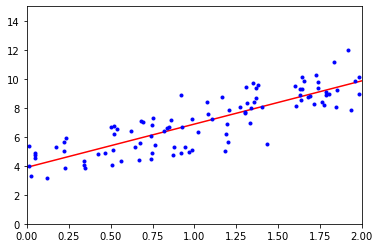

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(X,y)

LinearRegression()

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([3.89603344]), array([[2.98234288]]))

In [14]:
lin_reg.predict(X_new)

array([[3.89603344],
       [9.8607192 ]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

In [16]:
theta_best_svd

array([[3.89603344],
       [2.98234288]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[3.89603344],
       [2.98234288]])

In [18]:
eta = 0.1
n_iterations = 1000
m = 100

In [19]:
theta = np.random.rand(2, 1)

In [20]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[3.89603344],
       [2.98234288]])

In [22]:
n_epochs = 50
t0, t1 = 5, 50

In [23]:
def learning_schedule(t):
    return t0 / (t + t1)

In [24]:
theta = np.random.rand(2, 1)

In [25]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [26]:
theta

array([[3.94204102],
       [2.96571635]])

In [27]:
from sklearn.linear_model import SGDRegressor

In [28]:
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)

In [29]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88714011]), array([3.00598543]))

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 * np.random.randn(m, 1)

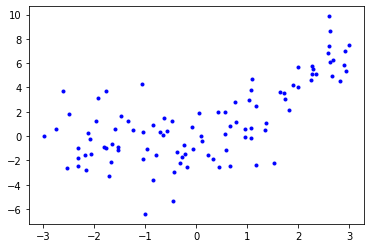

In [34]:
plt.plot(X, y, "b.")

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [41]:
X_poly = poly_features.fit_transform(X)

In [42]:
X[0]

array([2.23937161])

In [43]:
X_poly[0]

array([2.23937161, 5.01478522])

In [44]:
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [46]:
lin_reg.intercept_, lin_reg.coef_

(array([-0.48471595]), array([[1.0778019 , 0.54366242]]))

In [74]:
new_x = np.linspace(-3, 3)
new_x = np.split(new_x, len(new_x))
new_y = lin_reg.predict(poly_features.fit_transform(new_x))

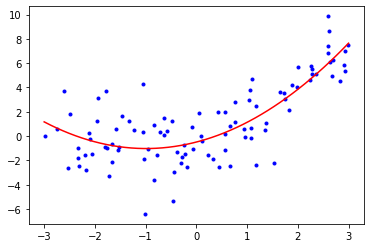

In [75]:
plt.plot(X, y, "b.")
plt.plot(new_x, new_y, "r-")

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [80]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

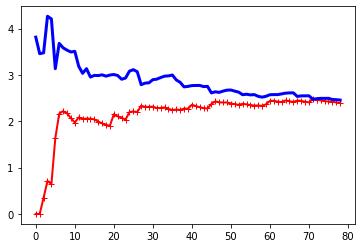

In [81]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree = 10, include_bias = False)), ("lin_reg", LinearRegression())])

(0.0, 3.0)

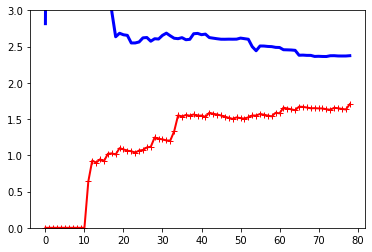

In [86]:
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0,3)

In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge_reg = Ridge(alpha = 1, solver = "cholesky")

In [89]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [90]:
ridge_reg.predict([[1.5]])

array([[2.9135474]])

In [91]:
sgd_reg = SGDRegressor(penalty = "l2")

In [92]:
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [93]:
sgd_reg.predict([[1.5]])

array([2.91361111])

In [94]:
from sklearn.linear_model import Lasso

In [95]:
lasso_reg = Lasso(alpha = 0.1)

In [96]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [97]:
lasso_reg.predict([[1.5]])

array([2.87015681])

In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [100]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [101]:
elastic_net.predict([[1.5]])

array([2.86480265])

In [107]:
from sklearn import datasets

In [108]:
iris = datasets.load_iris()

In [109]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [110]:
X = iris["data"][:, 3:]

In [115]:
y = (iris["target"] == 2).astype(np.int)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
log_reg = LogisticRegression()

In [116]:
log_reg.fit(X, y)

LogisticRegression()

In [119]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [121]:
y_proba = log_reg.predict_proba(X_new)

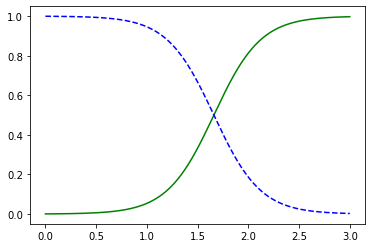

In [123]:
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginaica")
plt.show()

In [125]:
X = iris["data"][:, (2, 3)]

In [126]:
y = iris["target"]

In [127]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)

In [128]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')